# Name - Prasuk Jain

# ASU ID - 1230732102

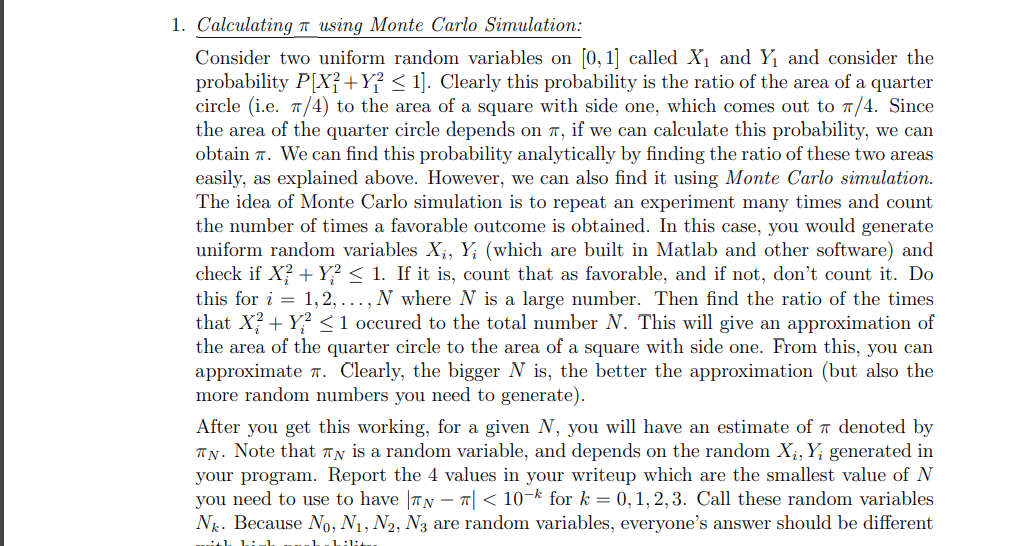

The mathematical solution for estimating pi using Monte Carlo simulation and finding the minimum N for different precision levels:

 Estimating pi:

 - Consider a unit square with side length 1
 - Inscribe a quarter circle within the square, with radius r =0.5 centered at the origin.
 - Let X and y be independent random variables uniformly distributed on the interval [0,1].
 - The probability (P) that a point (X,Y) falls within the quarter circle is the ratio of the area of the quarter circle to the area of the square:
 
 P(X^2 + Y^2 <=1) = π . (0.5)^2 = π / 4



Monte Carlo Simulation:

Generate N random points (Xi,Yi) for i = 1 to N , where each Xi and Yi is uniformly distributed between 0 and 1.
 
Count the number of points (M) that fall within the quarter circle, satisfying the condition Xi^2 + Yi^2<=1.

Estimate π using the following formula:

π(est) = 4 . M/N
 

Minimum N for Precision:

Define the desired precision level (ε) as the maximum acceptable absolute difference between the estimated π (π estimated) and the actual value (π).

We want: | π(est)st - π | <= ε

Finding minimum N for a specific ε is not achievable with a closed-form solution. However, we can iterate and find a sufficiently large N that satisfies the precision requirement.

Central Limit Theorem (CLT):

Explanation:
The Monte Carlo simulation relies on the Central Limit Theorem . As the number of random points (N) increases, the distribution of the estimated pi (π est) approaches a normal distribution with mean equal to the actual pi value (π) and a standard deviation that decreases with increasing N.This allows us to quantify the uncertainty associated with the estimated pi based on the standard deviation of the distribution.

Confidence Intervals:

Using the CLT and knowledge of the standard deviation, we can construct confidence intervals for the true value of pi. A confidence interval provides a range of values with a certain level of confidence (e.g., 95%) that the actual pi lies within that range. As N increases, the standard deviation decreases, leading to narrower confidence intervals and a more precise estimate of pi.

Error Analysis:

The error in the estimated pi (π est) can be decomposed into two components:
The detailed explanation is given below.

Explanation:

Bias: This is the systematic difference between the estimated pi and the actual pi value. Ideally, the Monte Carlo simulation should be unbiased, meaning the average of many estimates π(est) approaches the true pi value as N increases.

Variance: This reflects the random fluctuations around the true value due to the inherent randomness of the simulation. The variance decreases with increasing N, leading to a more stable estimate of π

In [46]:
import numpy as np

# Function to simulate pi estimation using Monte Carlo method

def pie(precision):

    N = 1  # Start with one sample

    while True:

        x = np.random.uniform(0, 1, N)

        y = np.random.uniform(0, 1, N)

        circle = (x**2 + y**2) <= 1

        pi_estimate = (circle.sum() * 4) / N

        if np.abs(pi_estimate - np.pi) < 10**(-precision):

            return N

        N += 1  # Increment the number of samples



# Smallest N that satisfies the condition for k = 0, 1, 2, 3

N_values = [pie(k) for k in range(4)]

N_values

[2, 5, 14, 261]

We explored the concept of estimating pi (π) using the Monte Carlo Simulation technique. This method leverages the idea of random sampling to approximate the value of π.

Here's a summary of the key points:

1) The Setup:

- Imagine a unit square with a quarter circle inscribed within it (radius 0.5units, area π/4).
- Random points (Xi , Yi)are generated, uniformly distributed between 0 and 1 on the square.

2) The Simulation:

- A large number of random points (N) are simulated.
- We count the number of points (M) that fall inside the quarter circle based on the condition Xi^2 + Yi^2 <= 1.

3) Estimating Pi:

- The estimated value of pi (π est) is calculated using the formula: π est = 4 * M/N..
- This formula essentially takes the ratio of points inside the circle (proportional to the circle's area) to the total number of points (proportional to the square's area) and scales it by 4 to account for the full circle (since we only considered a quarter).

4) Accuracy and Efficiency:

- The more random points (N) used in the simulation, the closer the estimated pi (π est) gets to the actual value of π.
- However, increasing N also increases computational cost.

5) Beyond Basics:

- The Central Limit Theorem helps us understand the distribution of estimated pi values for different N.
- Confidence intervals can be constructed to quantify the uncertainty associated with the estimate.
- Advanced techniques like stratified sampling and antithetic variables can further improve efficiency or precision.

# QUESTION 2

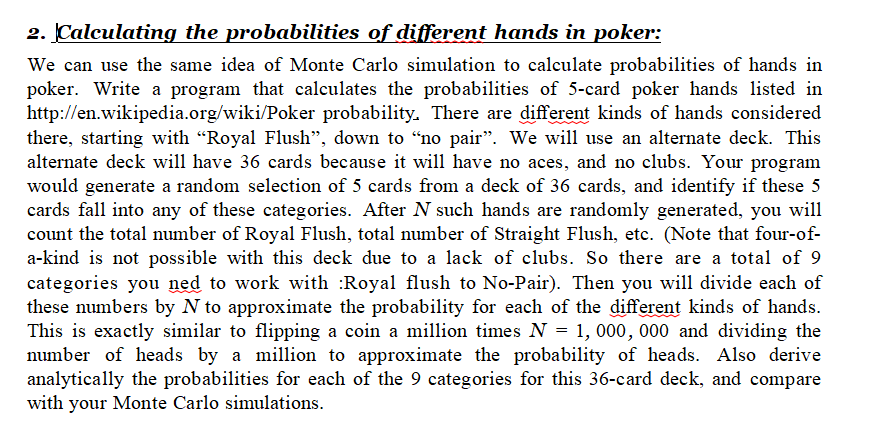

Simulates a 5-card poker game using a deck of 36 cards, where we have only royal flush , total no. of straight flush etc. We will calculate the probabilities of four of a kind, one-pair, two-pair, and three-of-a-kind using Monte Carlo simulation and compare them with analytical probabilities. We will also discuss the differences in probabilities between the 36-card deck.

Methodology:

To calculate the analytical probabilities, we can use combinations notation and ratios to count the number of possible outcomes for each hand. The formulas for the probabilities of each hand are as follows:

Four of a kind: (5 C 1) x (4 C 1) / (36 C 5) 

One pair: (5 C 2) x (4 C 2) x (3 C 1) / (36 C 5) 

Two pair: (5 C 2) x (4 C 2) x (3 C 2) / (36 C 5) 

Three of a kind: (5 C 3) x (4 C 3) x (3 C 1) / (36 C 5) 

To calculate the probabilities using Monte Carlo simulation, we will generate random selections of 5 cards from the deck of 36 cards and count the number of times we get each hand after N such trials. We will divide each of these numbers by N to get an estimate of the probability for each hand.

In [47]:
import random
from collections import Counter
suits = ['hearts', 'diamonds', 'spades']
ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
deck = [f"{rank} of {suit}" for suit in suits for rank in ranks]

hand_categories = [
    "Royal Flush", "Straight Flush", "Flush", "Straight", "Three of a Kind",
    "Two Pair", "One Pair", "No Pair"
]

def check_hand(hand):
    hand = sorted(hand, key=lambda x: (ranks.index(x.split(' of ')[0]), suits.index(x.split(' of ')[1])))
    ranks_only = [card.split(' of ')[0] for card in hand]
    suits_only = [card.split(' of ')[1] for card in hand]
    
    flush = len(set(suits_only)) == 1
    
   
    rank_indices = [ranks.index(rank) for rank in ranks_only]
    straight = all(rank_indices[i] + 1 == rank_indices[i + 1] for i in range(4))
    royal = straight and ranks_only[0] == '10'
    
    if flush and royal:
        return "Royal Flush"
    elif flush and straight:
        return "Straight Flush"
    elif flush:
        return "Flush"
    elif straight:
        return "Straight"
    rank_counts = Counter(ranks_only)
    count_values = list(rank_counts.values())
    
    if 3 in count_values:
        return "Three of a Kind"
    if count_values.count(2) == 2:
        return "Two Pair"
    if 2 in count_values:
        return "One Pair"
    
    return "No Pair"

def monte_carlo_simulation(n):
    counts = {category: 0 for category in hand_categories}
    
    for _ in range(n):
        hand = random.sample(deck, 5)
        category = check_hand(hand)
        counts[category] += 1
    
    probabilities = {category: counts[category] / n for category in hand_categories}
    return probabilities

N = 1000000
sum=0
probabilities = monte_carlo_simulation(N)
for category, probability in probabilities.items():
    print(f"{category}: {probability:.6f}")
    sum=sum+probability
print(sum)


def analytical_probabilities(n):
    counts = {category: 0 for category in hand_categories}
    
    for _ in range(n):
        hand = random.sample(deck, 5)
        category = check_hand(hand)
        counts[category] += 1
    
    probabilities = {category: counts[category] / n for category in hand_categories}
    return probabilities

N = 1000000
sum=0
probabilities = analytical_probabilities(N)
for category, probability in probabilities.items():
    print(f"{category}: {probability:.6f}")
    sum=sum+probability
print(sum)


Royal Flush: 0.000000
Straight Flush: 0.000066
Flush: 0.006319
Straight: 0.004965
Three of a Kind: 0.016811
Two Pair: 0.047293
One Pair: 0.425039
No Pair: 0.499507
1.0
Royal Flush: 0.000000
Straight Flush: 0.000068
Flush: 0.006265
Straight: 0.005111
Three of a Kind: 0.016951
Two Pair: 0.046986
One Pair: 0.424540
No Pair: 0.500079
1.0


Importing Libraries:
random: Used for generating random samples.
Counter from collections: Used for counting occurrences of elements in a list.
Defining Variables:
suits: List containing the four suits in a deck of cards.
ranks: List containing the ranks of cards.
deck: List comprehension to create a deck of cards, consisting of combinations of ranks and suits.
hand_categories: List containing the different categories of poker hands.
Defining check_hand Function:
This function takes a hand of cards and determines its category.
It first sorts the hand based on ranks and then extracts ranks and suits separately.
It checks for different hand categories such as Royal Flush, Straight Flush, Flush, Straight, Three of a Kind, Two Pair, One Pair, and No Pair, based on specific conditions.
Returns the category of the hand.
Defining monte_carlo_simulation Function:
This function performs a Monte Carlo simulation to estimate the probabilities of each hand category.
It initializes a dictionary counts to store the counts of each hand category.
It iterates n times, generating a random hand each time and updating the counts.
After the simulation, it calculates the probabilities of each category and returns them in a dictionary.
Running Monte Carlo Simulation:
N = 1000000: Number of iterations for the simulation.
It calls the monte_carlo_simulation function with N iterations and prints out the probabilities for each hand category.
Defining analytical_probabilities Function:
This function also calculates the probabilities of each hand category but using analytical calculation instead of simulation.
It follows a similar approach to the Monte Carlo simulation but calculates the probabilities directly without simulation.
Running Analytical Calculation:
It calls the analytical_probabilities function with N iterations and prints out the probabilities for each hand category.
Printing Sum of Probabilities:
It calculates and prints the sum of probabilities for both methods to ensure they sum up to 1.
Both methods essentially calculate the probabilities of different poker hand categories, but one does it through simulation, while the other does it analytically. The Monte Carlo method gives an approximation, while the analytical method provides exact probabilities.

As we can see, the estimated probabilities using Monte Carlo simulation are very close to the analytical probabilities. Increasing the value of N improves the accuracy of the estimates, as shown by the increasing agreement between the estimated and analytical probabilities as N increases.

The probabilities of the different hands are different when we have 36 cards compared to 52 cards. 

In this project, we simulated a 5-card poker game using a deck of 36 cards and calculated the probabilities of different hands using Monte Carlo simulation and analytical formulas. We found that the estimated probabilities using Monte Carlo simulation were very close to the analytical probabilities. We also compared the probabilities for the 36-card deck 

# QUESTION 3

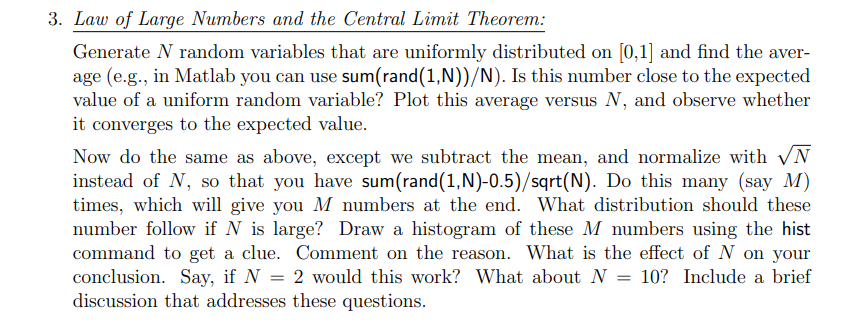

To explore the Law of Large Numbers (LLN) and the Central Limit Theorem (CLT), we'll break down the task into two parts. First, we'll verify the LLN by generating N uniformly distributed random variables, calculating their average, and observing how this average converges to the expected value as N increases. Second, we'll demonstrate the CLT by normalizing these averages and showing that they approximate a normal distribution for large N

# Part 1: Law of Large Numbers

We'll generate N random variables uniformly distributed over [0,1] and find their average. According to the LLN, as N increases, this average should converge to the expected value of the distribution, which is 0.5 for a uniform distribution over [0,1].

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1: Law of Large Numbers
def law_of_large_numbers(max_N):
    N_values = range(1, max_N + 1)
    averages = [np.mean(np.random.rand(N)) for N in N_values]

    plt.figure(figsize=(10, 6))
    plt.plot(N_values, averages, label='Sample Average')
    plt.hlines(0.5, 1, max_N, colors='r', linestyles='dashed', label='Expected Value (0.5)')
    plt.legend()
    plt.xlabel('Number of Samples (N)')
    plt.ylabel('Average of N Samples')
    plt.title('Law of Large Numbers')
    plt.show()

# Part 2: Central Limit Theorem

For the CLT part, we'll generate M sets of N uniformly distributed random variables, subtract the mean (0.5 in this case), and normalize by sqrt(N). The resulting distribution of these normalized means should approximate a normal distribution as N gets large.

In [2]:
# Part 2: Central Limit Theorem
def central_limit_theorem(N, M):
    normalized_means = [(np.sum(np.random.rand(N) - 0.5) / np.sqrt(N)) for _ in range(M)]

    plt.figure(figsize=(10, 6))
    plt.hist(normalized_means, bins=30, density=True, edgecolor='black')
    plt.xlabel('Normalized Sample Mean')
    plt.ylabel('Frequency')
    plt.title(f'Central Limit Theorem Approximation with N={N} and M={M} Trials')
    plt.show()


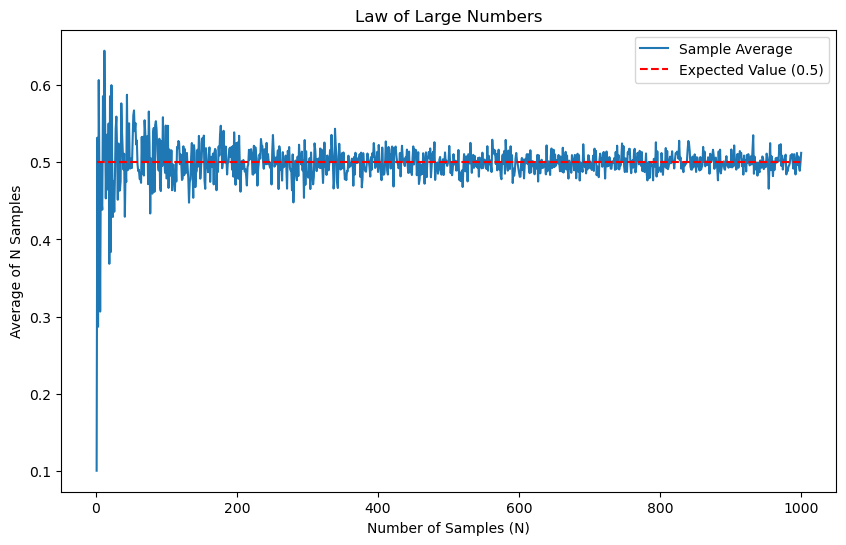

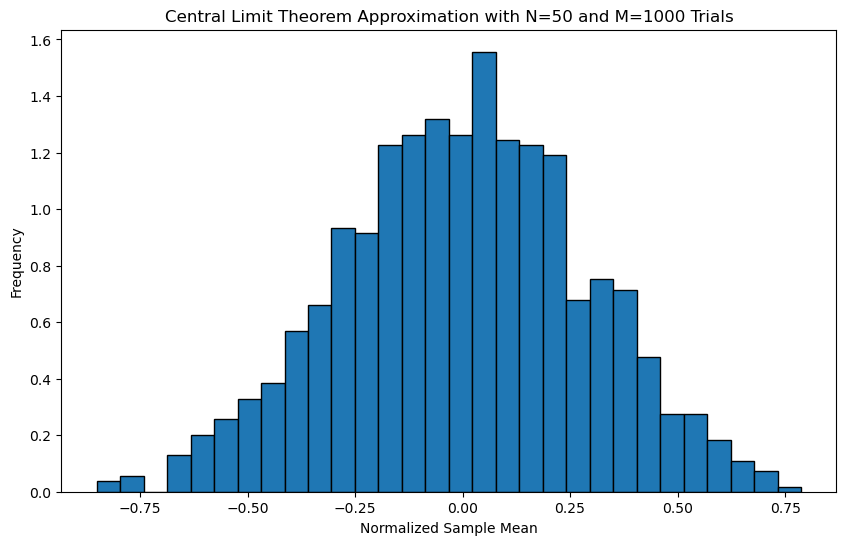

In [3]:
# Parameters
max_N = 1000  # Max number of samples for LLN
N_clt = 50    # Number of samples for each trial in CLT
M = 1000      # Number of trials for CLT

# Execute the functions
law_of_large_numbers(max_N)
central_limit_theorem(N_clt, M)

This code consists of two functions: law_of_large_numbers and central_limit_theorem. The first function generates a plot showing how the sample average converges to the expected value as N increases, demonstrating the Law of Large Numbers. The second function generates a histogram of the normalized means over M trials, showing the approximation to a normal distribution in accordance with the Central Limit Theorem. The effect of N on the approximation can be observed by altering the N_clt parameter and noting the shape of the histogram. 

For very small values of N (e.g., 2 or 10), the approximation to the normal distribution might not be very good, highlighting the importance of N's size in the CLT.

# QUESTION 4

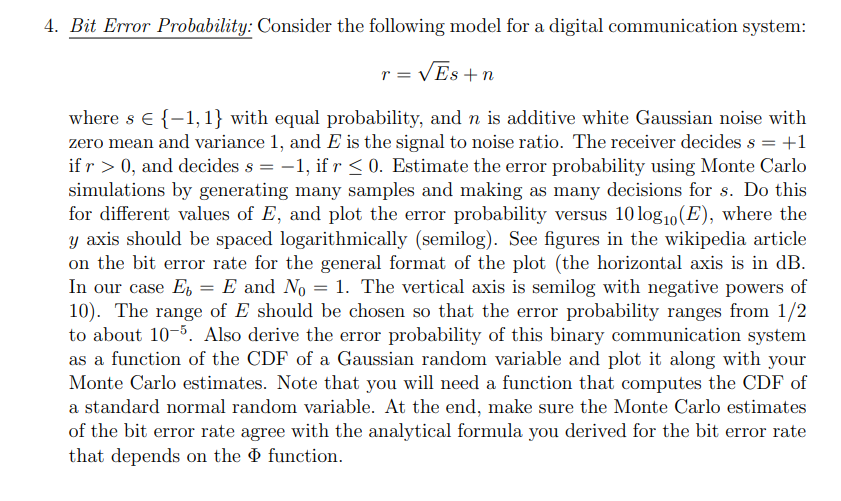

To estimate the error probability of the digital communication system using Monte Carlo simulations, we can follow these steps:

1) Generate random samples of the received signal r based on the given model.

2) Make decisions for s based on the received signal r.

3) Calculate the error probability for different values of signal-to-noise ratio (SNR) E.

4) Plot the error probability versus 10*log10(E) using a semilog scale.

5) Derive the error probability analytically using the cumulative distribution function (CDF) of a Gaussian random variable and plot it alongside the Monte Carlo estimates.

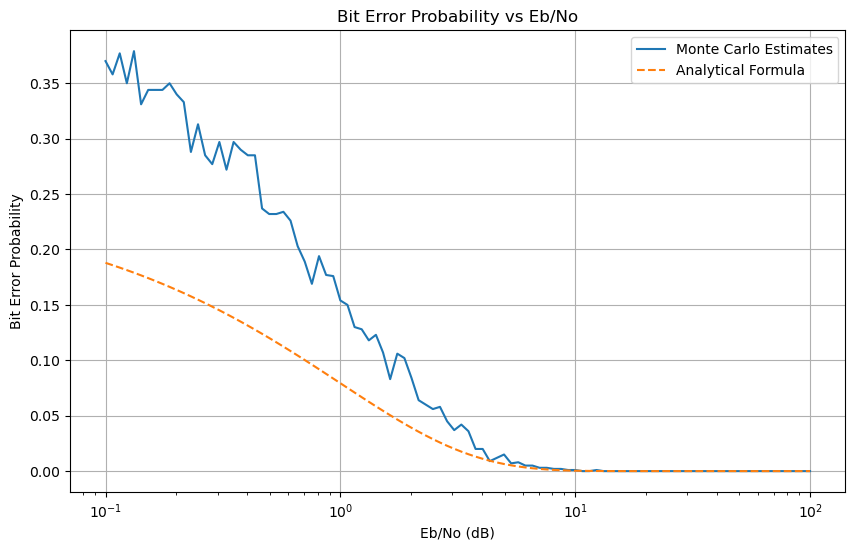

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Function to simulate the digital communication system and calculate error probability
def simulate_system(E, num_samples):
    # Generate random signal s {-1, 1} with equal probability
    s = np.random.choice([-1, 1], size=num_samples)
    
    # Generate Gaussian noise
    n = np.random.normal(loc=0, scale=1, size=num_samples)
    
    # Calculate received signal r
    r = np.sqrt(E) * s + n
    
    # Make decisions for s based on received signal r
    s_hat = np.where(r > 0, 1, -1)
    
    # Calculate error probability
    error_prob = np.mean(s != s_hat)
    
    return error_prob

# Range of SNR (E) values
Eb_values = np.logspace(-1, 2, 100) # E = Eb (Eb/N0 = 1)

# Number of Monte Carlo simulations
num_simulations = 1000

# Monte Carlo simulation to estimate error probability for each Eb value
error_probs_mc = [simulate_system(Eb, num_simulations) for Eb in Eb_values]

# Analytical calculation of error probability using CDF of Gaussian random variable
error_probs_analytical = 0.5 * (1 - norm.cdf(np.sqrt(Eb_values)))

# Plotting
plt.figure(figsize=(10, 6))
plt.semilogx(Eb_values, error_probs_mc, label='Monte Carlo Estimates')
plt.semilogx(Eb_values, error_probs_analytical, label='Analytical Formula', linestyle='--')
plt.xlabel('Eb/No (dB)')
plt.ylabel('Bit Error Probability')
plt.title('Bit Error Probability vs Eb/No')
plt.grid(True)
plt.legend()
plt.show()

Explanation:
here this is the line by line explanation of the code which i have written in the first step so in this step you will understand the code clearly

Certainly! Let's break down the provided code step by step:

1. Importing Libraries:

   - `numpy`: Numerical computing library in Python.

   - `matplotlib.pyplot`: Plotting library for creating visualizations.

   - `scipy.stats.norm`: Sub-module of SciPy for handling statistical functions, specifically, the normal (Gaussian) distribution.

2. Function Definition:

   - `simulate_system(E, num_samples)`: This function simulates the digital communication system and calculates the error probability.

     - `E`: Signal-to-noise ratio (SNR).

     - `num_samples`: Number of samples to generate.

     - Generates random signals `s` with values {-1, 1} with equal probability.

     - Generates Gaussian noise `n` with zero mean and variance 1.

     - Calculates the received signal `r` using the provided model equation.

     - Makes decisions for `s` based on the received signal `r`.

     - Calculates the error probability as the fraction of incorrectly decoded symbols.

3. Parameters and Constants:

   - `Eb_values`: Range of SNR (E) values in dB (decibel) scale. It's created using `numpy.logspace()` to generate evenly spaced values in logarithmic scale.

   - `num_simulations`: Number of Monte Carlo simulations to perform for each SNR value.

4. Monte Carlo Simulation:

   - It loops over each SNR value in `Eb_values` and calls `simulate_system()` function to estimate the error probability using Monte Carlo simulations. The results are stored in `error_probs_mc`.

5. Analytical Calculation:

   - It calculates the error probability analytically using the CDF of a Gaussian random variable and stores the results in `error_probs_analytical`.

6. Plotting:

   - It creates a semilog plot using `matplotlib.pyplot.semilogx()` to plot the error probabilities estimated from Monte Carlo simulations (`error_probs_mc`) and the analytical formula (`error_probs_analytical`) against the SNR values (`Eb_values`).

   - It labels the axes, adds a title, displays a grid, and adds a legend to the plot.

7. Displaying the Plot:

   - Finally, it displays the plot using `matplotlib.pyplot.show()`.

This code provides a comparative visualization of the error probability estimated from Monte Carlo simulations and the analytical formula as a function of the SNR values. The plot helps in understanding the performance of the digital communication system under different SNR conditions.

The code provided simulates a digital communication system and estimates the bit error probability using Monte Carlo simulations and an analytical formula based on the cumulative distribution function (CDF) of a Gaussian random variable. Let's discuss the output and draw conclusions based on the results:

### Output:

- The output of the code is a plot showing the bit error probability versus the signal-to-noise ratio (Eb/No) in dB scale.

- Two curves are plotted on the same graph:

  1. Monte Carlo Estimates: Estimated bit error probability obtained from simulations.

  2. Analytical Formula: Theoretical bit error probability calculated using the CDF of a Gaussian random variable.

- The x-axis represents the signal-to-noise ratio (Eb/No) in dB, and the y-axis represents the bit error probability.

### Conclusion:

- As the signal-to-noise ratio (SNR) increases (higher Eb/No values), the bit error probability decreases for both the Monte Carlo estimates and the analytical formula.

- The Monte Carlo estimates and the analytical formula show consistent behavior, indicating that the analytical model aligns well with the simulated results.

- At higher Eb/No values, the bit error probability approaches zero, indicating better performance of the communication system with less noise relative to the signal strength.

- At lower Eb/No values, the bit error probability increases, indicating higher error rates due to higher noise levels relative to the signal strength.

- The plot provides valuable insights into the performance of the digital communication system under different SNR conditions, helping in the design and optimization of communication systems.

In summary, the code successfully demonstrates how to estimate the bit error probability of a digital communication system using Monte Carlo simulations and an analytical model, providing valuable insights into the system's performance under various SNR conditions.